In [41]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\train"
validation_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\validation"
test_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\test"

In [43]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
IMG_SIZE=80

In [45]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(IMG_SIZE,IMG_SIZE), 
        batch_size=32,
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(IMG_SIZE,IMG_SIZE),
        batch_size=32,
        class_mode='binary')

Found 1278 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D


model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
callbacks=EarlyStopping(patience=4,monitor="val_loss")

In [28]:
history=model.fit(train_generator,
          validation_data=validation_generator,steps_per_epoch=40,validation_steps=8,
          epochs=20,callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 8 steps
Epoch 1/20
40/40 [==============================] - 10s 261ms/step - loss: 0.6968 - accuracy: 0.5149 - val_loss: 0.6877 - val_accuracy: 0.5163
Epoch 2/20
40/40 [==============================] - 10s 246ms/step - loss: 0.6601 - accuracy: 0.5986 - val_loss: 0.5893 - val_accuracy: 0.6667
Epoch 3/20
40/40 [==============================] - 10s 239ms/step - loss: 0.5479 - accuracy: 0.7324 - val_loss: 0.4376 - val_accuracy: 0.8496
Epoch 4/20
40/40 [==============================] - 10s 242ms/step - loss: 0.5217 - accuracy: 0.7465 - val_loss: 0.4389 - val_accuracy: 0.8089
Epoch 5/20
40/40 [==============================] - 9s 237ms/step - loss: 0.4840 - accuracy: 0.7739 - val_loss: 0.4091 - val_accuracy: 0.8008
Epoch 6/20
40/40 [==============================] - 10s 242ms/step - loss: 0.4803 - accuracy: 0.7700 - val_loss: 0.3860 - val_accuracy: 0.8537
Epoch 7/20
40/40 [==============================] - 

In [46]:
test_generator=test_datagen.flow_from_directory(test_path,
        target_size=(IMG_SIZE,IMG_SIZE),
       
        class_mode='binary')

Found 20 images belonging to 1 classes.


In [50]:
model.evaluate_generator(validation_generator)

  ...
    to  
  ['...']


[0.341047964990139, 0.8455285]

In [31]:
model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


array([[9.96728420e-01, 3.27158230e-03],
       [9.75205541e-01, 2.47943848e-02],
       [2.11101264e-01, 7.88898766e-01],
       [2.79055275e-02, 9.72094536e-01],
       [7.79219389e-01, 2.20780626e-01],
       [7.99414098e-01, 2.00585946e-01],
       [9.16310668e-01, 8.36893469e-02],
       [1.65542409e-01, 8.34457636e-01],
       [1.00984040e-03, 9.98990119e-01],
       [9.95931208e-01, 4.06875368e-03],
       [1.48216993e-01, 8.51783037e-01],
       [4.96634275e-01, 5.03365755e-01],
       [2.77340109e-03, 9.97226536e-01],
       [9.88447845e-01, 1.15521094e-02],
       [9.34630930e-01, 6.53690770e-02],
       [3.82019579e-01, 6.17980421e-01],
       [1.03995316e-01, 8.96004677e-01],
       [6.68395534e-02, 9.33160424e-01],
       [9.99537945e-01, 4.62098076e-04],
       [9.99925971e-01, 7.40610485e-05]], dtype=float32)

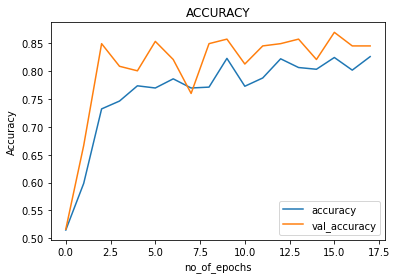

In [32]:
import numpy as np
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))
plt.xlabel("no_of_epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

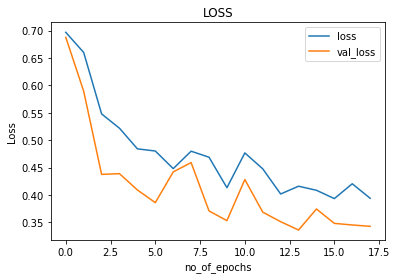

In [33]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
plt.xlabel("no_of_epochs")
plt.ylabel("Loss")
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [34]:
from tensorflow.keras.models import load_model
model.save(r"C:\Users\Aniruddh Srivatsa\Downloads\gender_class.h5")

In [49]:
from tensorflow.keras.models import load_model
loaded_model = load_model(r"C:\Users\Aniruddh Srivatsa\Downloads\gender_class.h5") 
loss, accuracy = loaded_model.evaluate_generator(validation_generator) 
print(loss,accuracy)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
0.341047964990139 0.8455285


In [36]:
from sklearn.metrics import precision_recall_fscore_support as prfs

In [37]:
print(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
y_pred=loaded_model.predict_generator(validation_generator)
y_pred[200:230]

array([[0.94622904, 0.05377093],
       [0.05560629, 0.9443937 ],
       [0.8641362 , 0.13586377],
       [0.03535832, 0.9646417 ],
       [0.85617214, 0.14382789],
       [0.99828535, 0.00171464],
       [0.01063592, 0.989364  ],
       [0.96235514, 0.03764489],
       [0.04187629, 0.95812374],
       [0.93899864, 0.06100138],
       [0.9975407 , 0.00245929],
       [0.7919217 , 0.20807834],
       [0.14487422, 0.8551257 ],
       [0.01294653, 0.98705345],
       [0.9757416 , 0.0242584 ],
       [0.13058706, 0.86941296],
       [0.98475987, 0.01524018],
       [0.09307264, 0.90692735],
       [0.6547587 , 0.3452413 ],
       [0.00172391, 0.9982761 ],
       [0.10303827, 0.8969617 ],
       [0.9944307 , 0.00556931],
       [0.9755343 , 0.02446561],
       [0.00532282, 0.9946772 ],
       [0.94167346, 0.05832651],
       [0.02375264, 0.9762473 ],
       [0.9790001 , 0.02099998],
       [0.04644621, 0.9535538 ],
       [0.03429572, 0.9657043 ],
       [0.12701173, 0.8729883 ]], dtype=flo

In [39]:
lab=["female","male"]
lab1=[0,1]

In [40]:
import numpy as np

In [41]:
np.argmax(y_pred[211])

0

In [42]:
result=[]

In [43]:
for i in range(len(y_pred)):
  result.append(lab1[np.argmax(y_pred[i])])
result[:10]

[1, 1, 1, 1, 0, 1, 1, 0, 1, 0]

In [44]:
len(result)

246

In [45]:
print("precision is: ", prfs(validation_generator.classes,result,average="macro")[0])
print("recall is: ", prfs(validation_generator.classes,result,average="macro")[1])
print("f_score is: ", prfs(validation_generator.classes,result,average="macro")[2])    

precision is:  0.5289450682444699
recall is:  0.5284552845528455
f_score is:  0.526452041154995


In [39]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

import cv2
import os
import cvlib as cv
                    

# open webcam
webcam = cv2.VideoCapture(0)
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX-10,startY-12), (endX+10,endY+12), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY-12:endY+12,startX-10:endX+10])
        
        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (80,80))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = loaded_model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]
        
        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)
        print("label: ",label,"probability: ", loaded_model.predict(face_crop)[0])
    # display output
    cv2.imshow("gender detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

label:  man: 89.87% probability:  [0.898729   0.10127094]
label:  woman: 91.65% probability:  [0.08349144 0.9165086 ]
label:  man: 93.35% probability:  [0.9334761  0.06652397]
label:  woman: 93.23% probability:  [0.06774236 0.93225765]
label:  man: 92.55% probability:  [0.9254574  0.07454261]
label:  woman: 91.14% probability:  [0.08858244 0.9114176 ]
label:  man: 93.32% probability:  [0.93321717 0.06678285]
label:  woman: 91.53% probability:  [0.08469097 0.9153091 ]
label:  man: 92.43% probability:  [0.924258   0.07574203]
label:  woman: 94.61% probability:  [0.05389464 0.94610536]
label:  man: 91.70% probability:  [0.91698533 0.08301465]
label:  woman: 85.97% probability:  [0.14026076 0.85973924]
label:  man: 92.65% probability:  [0.9265123  0.07348774]
label:  woman: 83.54% probability:  [0.16464037 0.8353597 ]
label:  man: 93.86% probability:  [0.9385618  0.06143826]
label:  woman: 86.96% probability:  [0.13042057 0.8695795 ]
label:  man: 93.73% probability:  [0.9373224  0.06267759